# Figure 1

Here we'll generate figure 1.
It contains a scree plot on the percentage of variance explained by each PC, a scatter plot of PC1 and PC2 with the whole sample, including projected faces of sexual dimorphism on top of them. Finally, it shows the distribution of the PC scores divided by sex, including the estimated sexual dimorphism resulted when adding each new PC.

In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import os
from matplotlib import cm
from Faces import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

Reading databases

In [2]:
#Folders
thispath      = os.getcwd()
projpath      = os.path.realpath("../..")
pathlandmarks = os.path.join(projpath, "Results", "Landmarks")
pathfacepca   = os.path.join(projpath, "DataBases", "FacePCA")
pathres       = os.path.join(projpath, "Results")
pathfig       = os.path.join(projpath, "Results", "Figures")

In [3]:
#Databases
os.chdir(pathfacepca)
facets = pd.read_csv("facets.csv", header = None)
eigenvals = pd.read_csv("eigenvalues.csv", header = None)
total_avg_shape = np.matrix(pd.read_csv("total_avg_sex_shape.txt", header = None))
os.chdir(pathres)
dat = pd.read_csv("tot_samples.csv")
os.chdir(pathlandmarks)
pc_landmark  = np.matrix(pd.read_csv("PC_landmarks.csv", header = None))
avg_landmark = np.matrix(pd.read_csv("avg_landmarks.csv", header = None))

In [4]:
#Define some functions
def scatter_gm(x, y, group, ax, ticks = 1, xlim = [-0.1, 0.1], ylim = [-0.1, 0.1], means = 0):
    '''
    Generate geometric morphometrics like scatter plot, with axes going through the origin using different colors for groups.
    This function generates an ax object, make sure to have your figure (fig) object already called
    Usage
        Input:
            - x: values to be plotted in the x coordinates
            - y: values to be plotted in the y coordinates
            - group: grouping variable to be maped on the scatter plot
            - ax: ax from matplotlib
            - ticks: whether to maintain the default ticks (0), or use one from -0.1 to 0.1 (1)
            - xlim: the limits of x axis
            - ylim: the limits of y axis
            - means: whether mean values of the group variable are to be highlighted (0/1)
    '''
    #Importing required libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    color = group.map(color_map)
    if means == 0:
        al = 0.5
    elif means == 1:
        al = 0.2
        mean_male = [x[group=="Male"].mean(), y[group=="Male"].mean()]
        mean_female = [x[group=="Female"].mean(), y[group=="Female"].mean()]

    ax.scatter(x, y, alpha = al, c=color )
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 
    
    if means == 1:
        ax.scatter(mean_female[0], mean_female[1], c = color_map['Female'], s=100, edgecolors='black' )
        ax.scatter(mean_male[0], mean_male[1], c = color_map['Male'], s=100, edgecolors='black' )
    
    if ticks == 1:
        plt.xticks([-0.1, -0.05, 0.05, 0.1])
        plt.yticks([-0.1, -0.05, 0.05, 0.1])
    elif ticks == 0:
        plt.xticks([])
        plt.yticks([])
        
def paste_screenshot(face, ax, pos = (0,0)):
    img   = face.take_screenshot()
    image = OffsetImage(img, zoom=0.05)
    ab = AnnotationBbox(image, pos, xycoords='data', frameon=False)
    ax.add_artist(ab)

Plot figure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

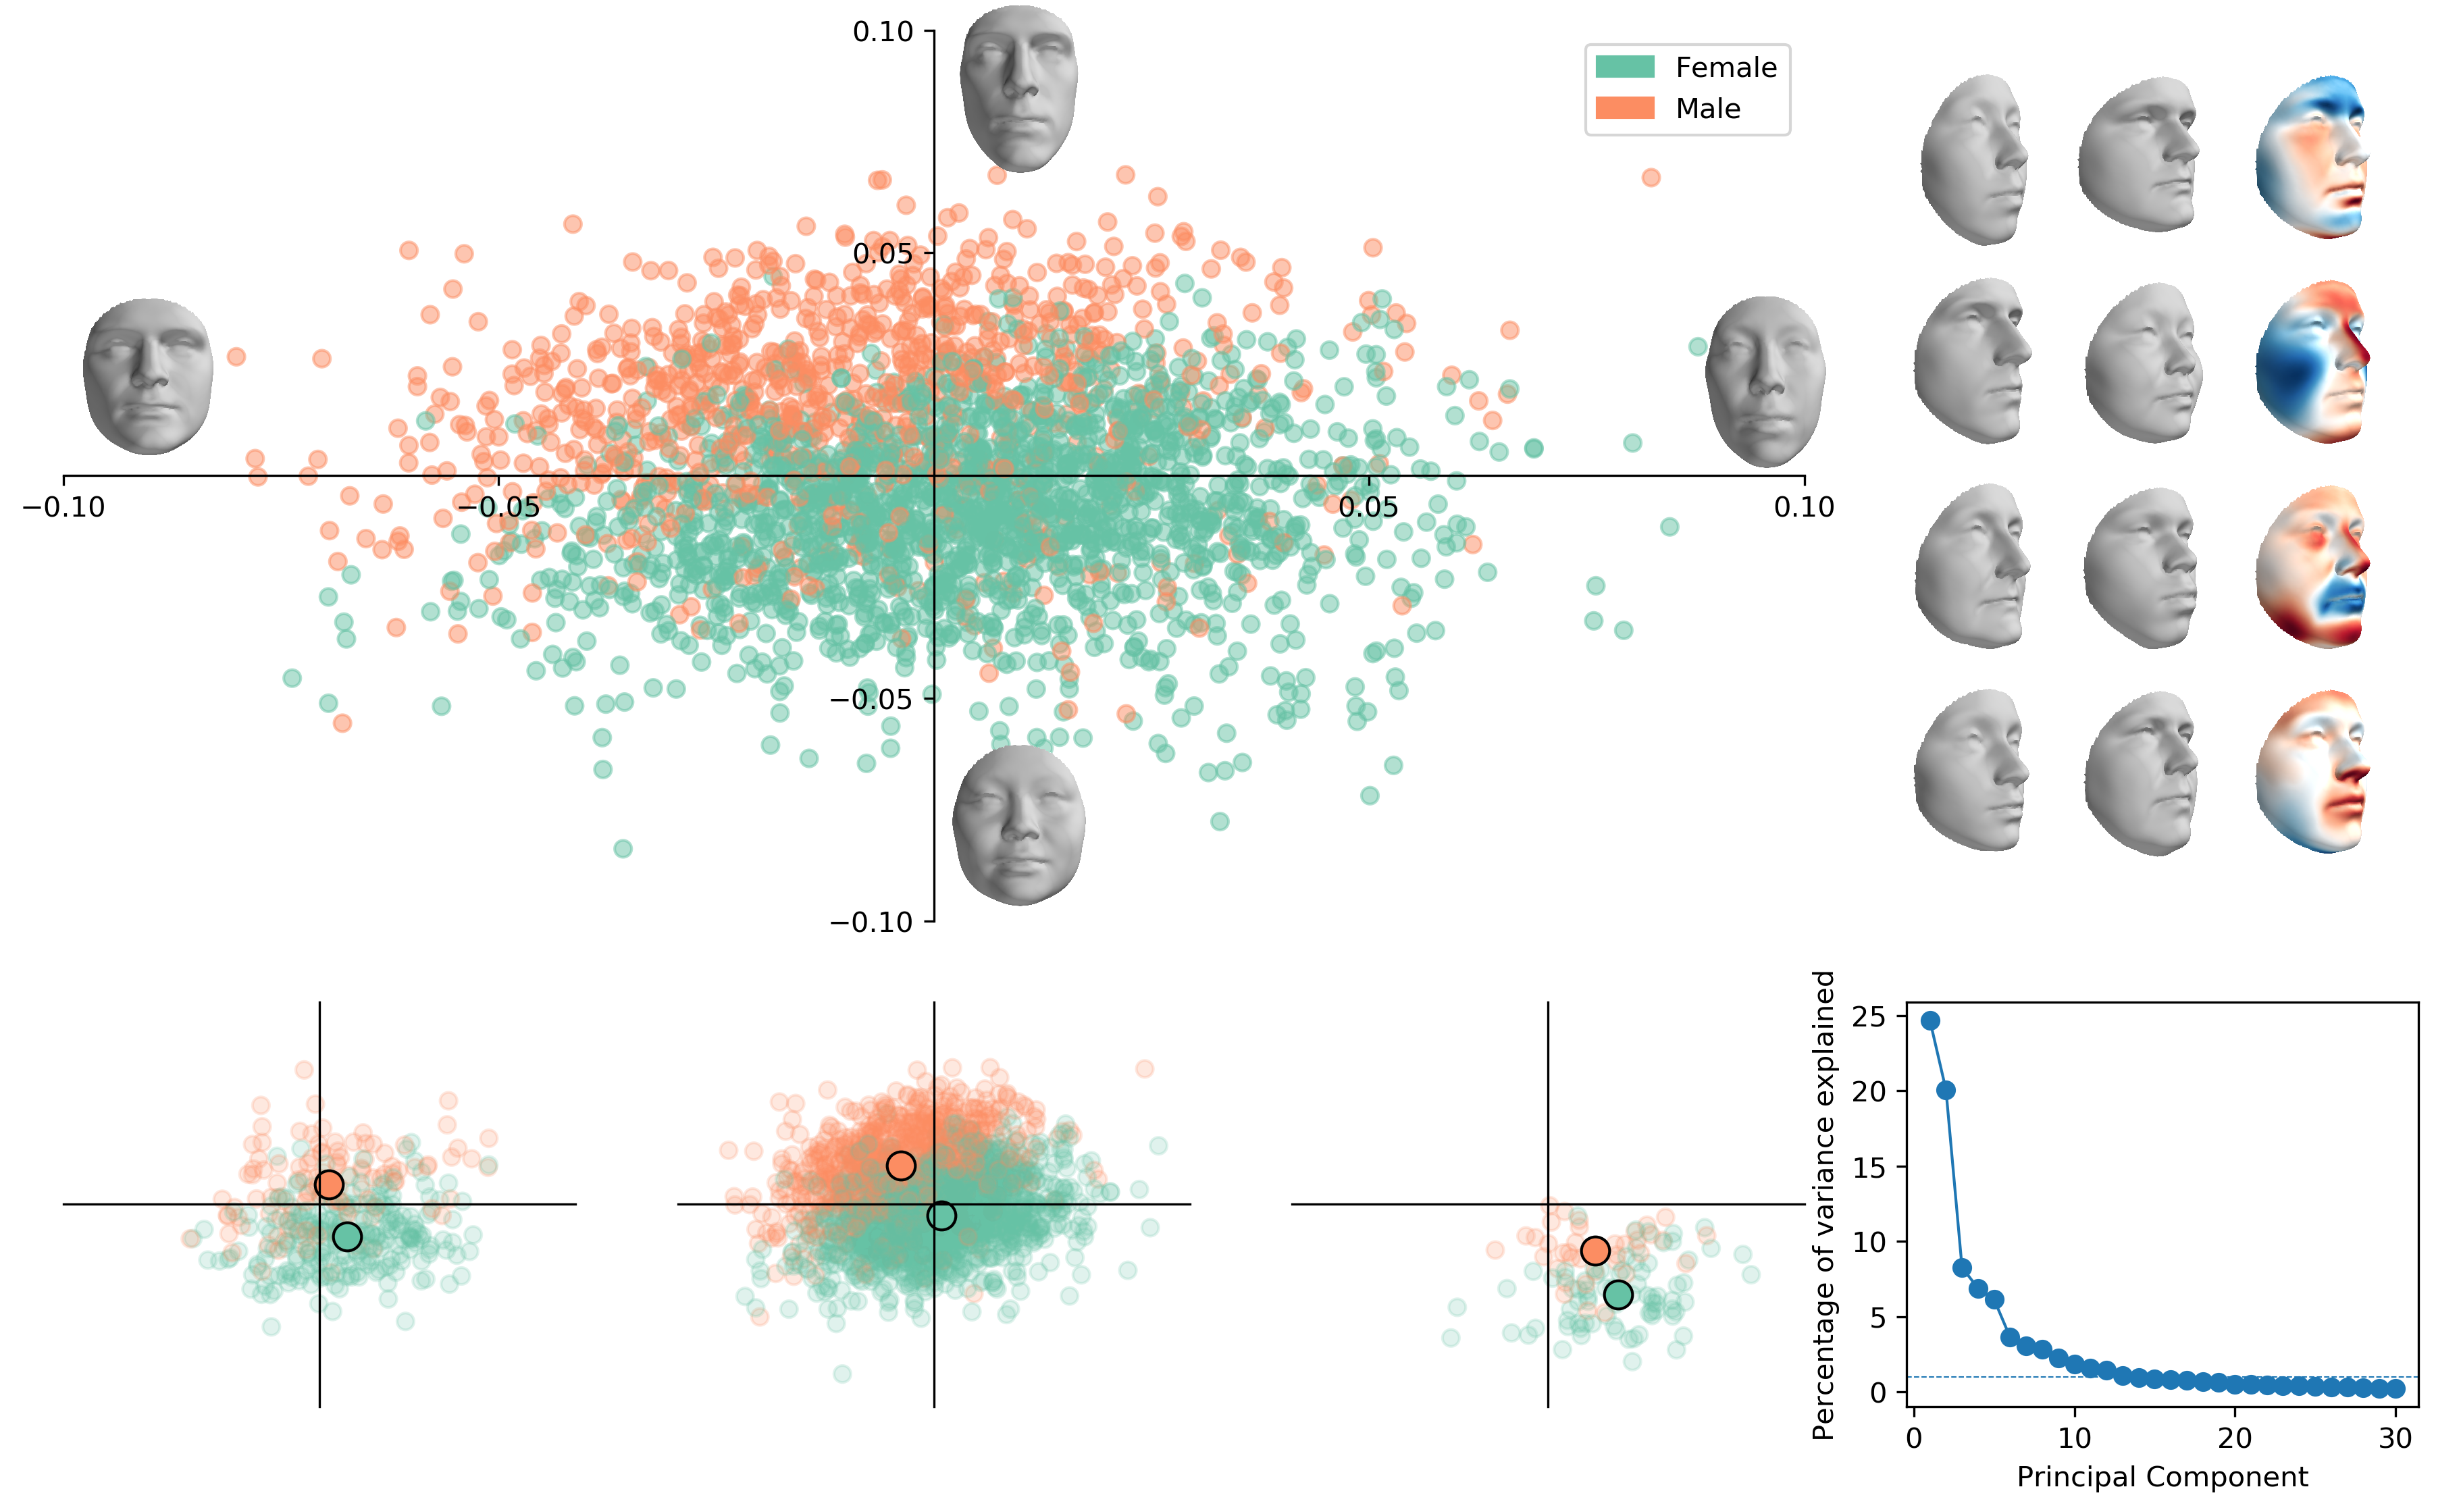

In [5]:
ngroups = dat['cluster_final'].max()

color_labels = dat['Sex'].unique()
rgb_values   = sns.color_palette('Set2', 2)
color_map    = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(15, 9), dpi=300)
gs  = gridspec.GridSpec(3, 4)
ax  = fig.add_subplot(gs[0:2,0:3])
scatter_gm(dat['PC1'], dat['PC2'], dat['Sex'], ax)

face1 = FaceShape(pc_landmark[0,:], facets)
face2 = FaceShape(pc_landmark[1,:], facets)
face3 = FaceShape(pc_landmark[2,:], facets)
face4 = FaceShape(pc_landmark[3,:], facets)

paste_screenshot(face1, ax, (0.0957, 0.02) )
paste_screenshot(face2, ax, (-0.09, 0.02) )
paste_screenshot(face3, ax, (0.01, 0.085) )
paste_screenshot(face4, ax, (0.01, -0.08) )

#Setting the legend
female_patch = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Female"], label='Female')
male_patch   = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Male"], label='Male')

plt.legend(handles=[female_patch, male_patch])

#Ploting small plots
for i in range(ngroups):
    newPC1 = dat[dat['cluster_final'] == i+1]['PC1'].reset_index(drop=True)
    newPC2 = dat[dat['cluster_final'] == i+1]['PC2'].reset_index(drop=True)
    newSex = dat[dat['cluster_final'] == i+1]['Sex'].reset_index(drop=True)
    ax     = fig.add_subplot(gs[2,i])
    scatter_gm(newPC1, newPC2, newSex, ax, ticks=0, means=1) 

#Plot scree plot
nPCs = 30
ax   = fig.add_subplot(gs[2,3])
sig_vals = np.arange(nPCs) + 1
ax.plot(sig_vals, eigenvals[1][0:nPCs], 'o-', linewidth=1)
ax.axhline(1, 0, nPCs, linestyle = "--", linewidth=0.5)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Percentage of variance explained')

#Plot set of faces
#Plot PC effects
nrow = 4
ncol = 3
ax  = fig.add_subplot(gs[0:2,3])
ax.set_xlim(0, 0.6)
plt.axis('off')

crow = 0.85
for i in range(0, nrow*2, 2):
    index = 0
    face1 = FaceShape(pc_landmark[i], facets)
    face2 = FaceShape(pc_landmark[i+1], facets)
    img1 = face1.take_screenshot(profile=1)
    img2 = face2.take_screenshot(profile=1)
    dist  = face1.get_normal_displacement(face2)
    avg   = (face1.landmarks + face2.landmarks) / 2
    avgface = FaceShape(avg, facets)
    img3 = avgface.take_screenshot(colormap=dist, profile=1, colortype='RdBu')
    
    image1 = OffsetImage(img1, zoom=0.05)
    image2 = OffsetImage(img2, zoom=0.05)
    image3 = OffsetImage(img3, zoom=0.05)
    
    a1 = AnnotationBbox(image1, (0.1, crow), xycoords='data', frameon=False)
    a2 = AnnotationBbox(image2, (0.3, crow), xycoords='data', frameon=False)
    a3 = AnnotationBbox(image3, (0.5, crow), xycoords='data', frameon=False)
    
    ax.add_artist(a1)
    ax.add_artist(a2)
    ax.add_artist(a3)
    
    crow = crow - 0.23

#os.chdir(pathfig)
#plt.savefig("Figure2.png")
plt.show()

# Another way of ploting

In [4]:
#Define some functions
def scatter_gm(x, y, group, ax, xlim = [-0.1, 0.1], ylim = [-0.1, 0.1], means = (0,0,0,0) ):
    '''
    Generate geometric morphometrics like scatter plot, with axes going through the origin using different colors for groups.
    This function generates an ax object, make sure to have your figure (fig) object already called
    Usage
        Input:
            - x: values to be plotted in the x coordinates
            - y: values to be plotted in the y coordinates
            - group: grouping variable to be maped on the scatter plot
            - ax: ax from matplotlib
            - xlim: the limits of x axis
            - ylim: the limits of y axis
            - means: the values to highlight in the plot (females first)
    '''
    #Importing required libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    color = group.map(color_map)
    al = 0.5
    ax.scatter(x, y, alpha=al, c=color, edgecolors='grey', linewidths=1 )
    
    if means == (0,0,0,0):
        al = 0.5
    else:
        al = 0.3
        mean_female = means[0:2]
        mean_male   = means[2:4]
        ax.scatter(mean_female[0], mean_female[1], c = color_map['Female'], s=120, edgecolors='black' )
        ax.scatter(mean_male[0], mean_male[1], c = color_map['Male'], s=120, edgecolors='black' )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 
    plt.axis('off')
    ax.plot((0,0), ylim, 'k-')
    ax.plot(xlim, (0,0), 'k-')        
            


In [5]:
#To run regression in R

#Y and X matrices
Y = dat.iloc[:,6:19]
X = dat.iloc[:, list(range(1,6)) +  [20]]

#Importing libraries
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
base  = importr('base')
stats = importr('stats')
car   = importr('car')
pandas2ri.activate()

#Moving to R global environment
robjects.globalenv['Y'] = Y 
robjects.globalenv['X'] = X 

#Running linear regression
M = stats.lm('as.matrix(Y) ~ scale(X$Age) + scale(X$BMI) + scale(X$Height) + X$Sex', 
             data = base.as_symbol('X'))
coeffs = M.rx2('coefficients')
#To pandas dataframe
coeffspd = pd.DataFrame(pandas2ri.ri2py(coeffs),
             index=coeffs.names[0], columns=coeffs.names[1])

#Getting the means
sex_means = (coeffspd.iloc[0,0], coeffspd.iloc[0,1], 
             coeffspd.iloc[0,0] + coeffspd.iloc[4,0], 
             coeffspd.iloc[0,1] + coeffspd.iloc[4,1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


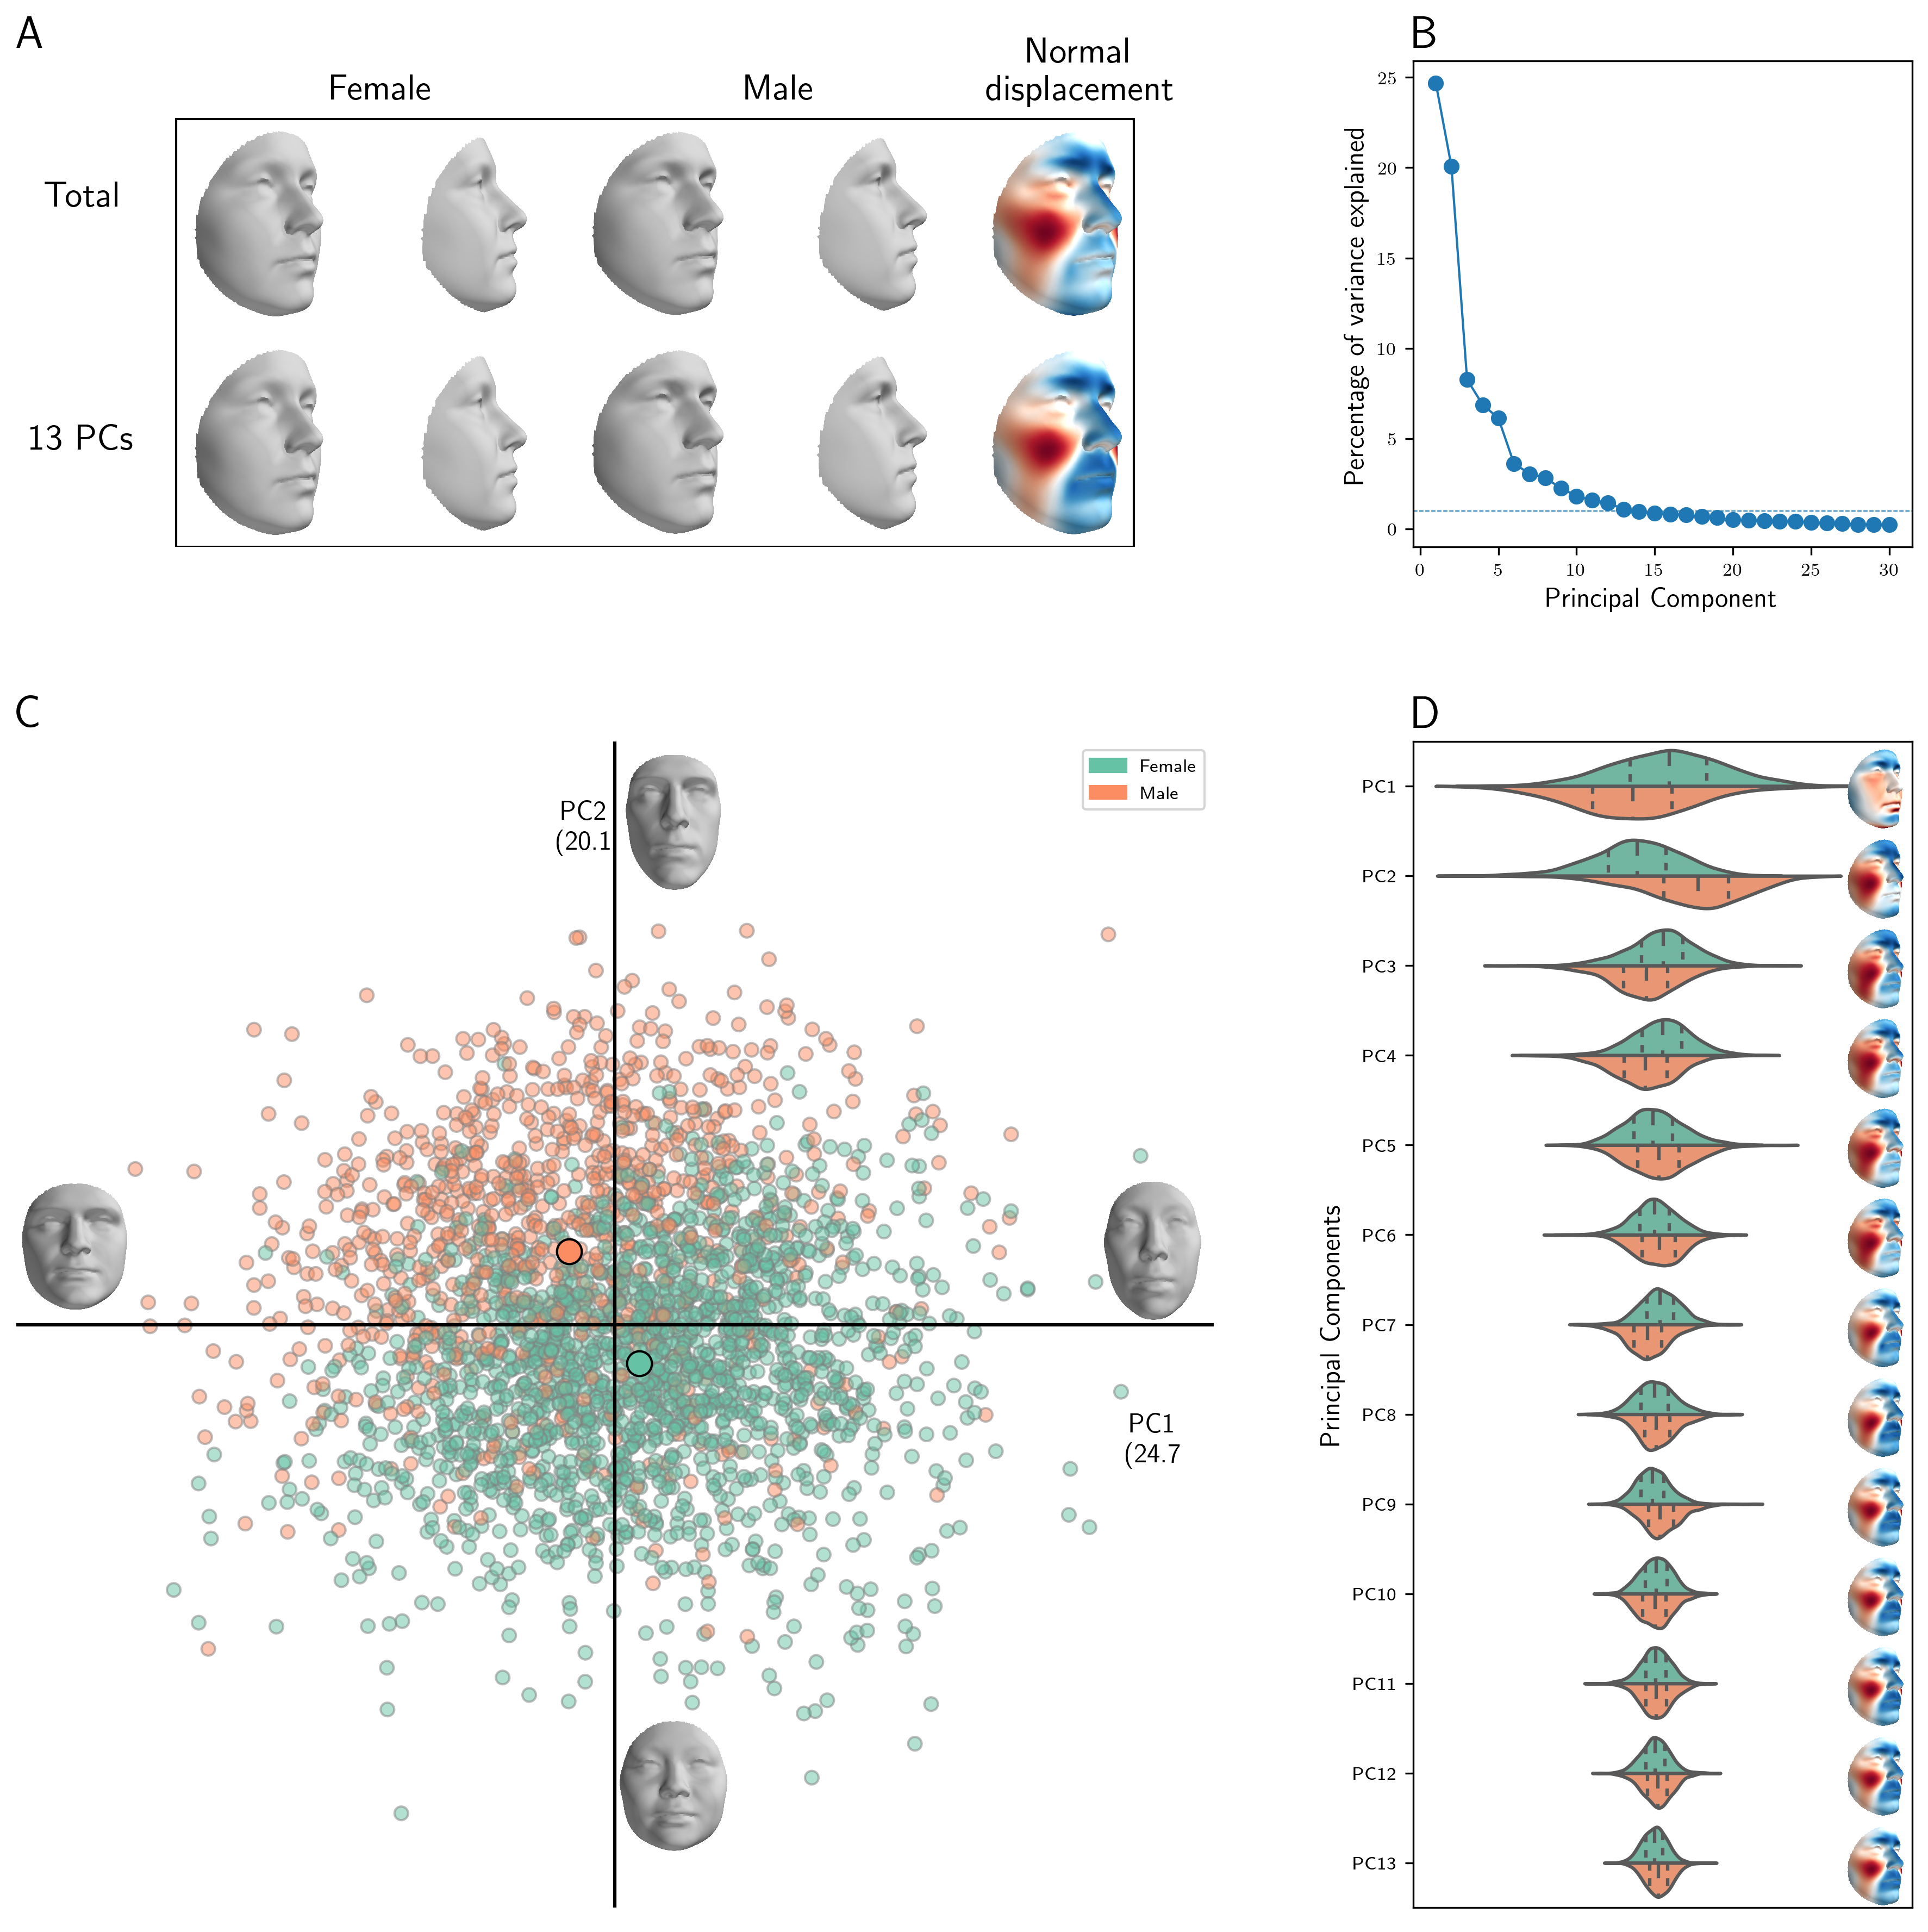

In [6]:
#### PROPER FIGURE ####

### Font settings ###
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "sans-serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}

mpl.rcParams.update(nice_fonts)

### General settings ###
ngroups = dat['cluster_final'].max()
color_labels = dat['Sex'].unique()
rgb_values   = sns.color_palette('Set2', 2)
color_map    = dict(zip(color_labels, rgb_values))
fig = plt.figure(figsize=(15, 15), dpi=300)
gs  = gridspec.GridSpec(3, 3, wspace = 0.4, hspace = 0.4)


##### PLOT 1 #####
### Patterns of sexual dimorphism ###
nrow = 2
ncol = 3
ax  = fig.add_subplot(gs[0,0:2])
ax.set_xlim(0, 0.9)
plt.axis('off')
#plt.xticks([], [])

crow = 0.65
for i in range(0, nrow*2, 2):
    if i == 0:
        s = len(avg_landmark)
        face1 = FaceShape(avg_landmark[s-2], facets)
        face2 = FaceShape(avg_landmark[s-1], facets)
        dist2 = face1.get_normal_displacement(face2)
    if i == 2:
        face1 = FaceShape(total_avg_shape[0], facets)
        face2 = FaceShape(total_avg_shape[1], facets)
        dist1 = face1.get_normal_displacement(face2)
        
dist = np.array([dist1, dist2])
index = 0
zx    = 0.07 #zoom
for i in range(0, nrow*2, 2):
    if i == 0:
        s = len(avg_landmark)
        face1 = FaceShape(avg_landmark[s-2], facets)
        face2 = FaceShape(avg_landmark[s-1], facets)
    if i == 2:
        face1 = FaceShape(total_avg_shape[0], facets)
        face2 = FaceShape(total_avg_shape[1], facets)

    #Female faces
    face1.paste_screenshot(ax, pos = (0.20, crow), z=zx, prof=1 )
    face1.paste_screenshot(ax, pos = (0.35, crow), z=zx, prof=2 )
    
    face2.paste_screenshot(ax, pos = (0.50, crow), z=zx, prof=1 )
    face2.paste_screenshot(ax, pos = (0.65, crow), z=zx, prof=2 )
    
    norm_dist = (dist[index] - dist.min() ) / (dist.max() - dist.min() )
    avg   = (face1.landmarks + face2.landmarks) / 2
    avgface = FaceShape(avg, facets)
    
    avgface.paste_screenshot(ax, z=zx, pos = (0.80, crow), colorm=norm_dist, prof=1, colort='RdBu' )
    
    crow = crow - 0.45
    index = index + 1

fsize = 16
ax.text(0.05, 0.70, "Total", fontsize=fsize, horizontalalignment='center')
ax.text(0.05, 0.20, "13 PCs", fontsize=fsize, horizontalalignment='center')

ax.text(0.275, 0.92, "Female", fontsize=fsize, horizontalalignment='center')
ax.text(0.575, 0.92, "Male", fontsize=fsize, horizontalalignment='center')
ax.text(0.80, 0.92, "Normal\ndisplacement", fontsize=fsize, horizontalalignment='center')

ax.set_title('A', loc = 'left', fontdict={'fontsize': 20, 'fontweight' : 900} )
ax.add_patch(Rectangle((0.12, 0), 0.72, 0.88, fill=None, alpha=1))

#### PLOT 2 ####
### Plot scree plot ###
nPCs = 30
ax   = fig.add_subplot(gs[0,2])
sig_vals = np.arange(nPCs) + 1
ax.plot(sig_vals, eigenvals[1][0:nPCs], 'o-', linewidth=1)
ax.axhline(1, 0, nPCs, linestyle = "--", linewidth=0.5)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Percentage of variance explained')
ax.set_title('B', loc = 'left', fontdict={'fontsize': 20, 'fontweight' : 900} )

#### PLOT 3 ####
### GM scatter plot ###
ax  = fig.add_subplot(gs[1:,0:2])
scatter_gm(dat['PC1'], dat['PC2'], dat['Sex'], ax, means=sex_means)

face1 = FaceShape(pc_landmark[0,:], facets)
face2 = FaceShape(pc_landmark[1,:], facets)
face3 = FaceShape(pc_landmark[2,:], facets)
face4 = FaceShape(pc_landmark[3,:], facets)

face1.paste_screenshot(ax, pos = (0.09, 0.012) )
face2.paste_screenshot(ax, pos = (-0.09, 0.012) )
face3.paste_screenshot(ax, pos = (0.01, 0.085) )
face4.paste_screenshot(ax, pos = (0.01, -0.08) )

#Setting the legend
female_patch = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Female"], label='Female')
male_patch   = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Male"], label='Male')

plt.legend(handles=[female_patch, male_patch])

ax.set_title('C', loc = 'left', fontdict={'fontsize': 20, 'fontweight' : 900} )
ax.text(0.09, -0.02,'PC1\n(' + str(round(eigenvals[1][0], 1)) + '%)', horizontalalignment='center', verticalalignment='center')
ax.text(-0.005, 0.085,'PC2\n(' + str(round(eigenvals[1][1], 1)) + '%)', horizontalalignment='center', verticalalignment='center')

#### PLOT 4 ####
### Violin plots ###
ax  = fig.add_subplot(gs[1:,2])
long_dat = pd.melt(dat.iloc[:, [1] + list(range(6,19)) ] , id_vars = 'Sex')
sns.violinplot(x = 'value', y = 'variable', data=long_dat, hue = 'Sex', split=True, palette = 'Set2', ax = ax, inner='quartile')
ax.get_xaxis().set_ticks([])
ax.set_xlabel('')
ax.set_ylabel('Principal Components')
ax.get_legend().remove()
ax.set_title('D', loc = 'left', fontweight='bold', fontdict={'fontsize': 20} )
#ax.set_title('d', loc = 'left', fontweight='bold' )


crow=0.07

for i in range(0, len(avg_landmark), 2):
    face1 = FaceShape(avg_landmark[i], facets)
    face2 = FaceShape(avg_landmark[i+1], facets)
    dist  = face1.get_normal_displacement(face2)
    avg   = (face1.landmarks + face2.landmarks) / 2
    avgface = FaceShape(avg, facets)
    
    avgface.paste_screenshot(ax, z = 0.03, pos = (0.097, crow), prof = 1, colorm = dist, colort = 'RdBu')

    crow = crow+1
    
os.chdir(pathfig)
plt.savefig("Figure1.pdf", dpi = 300, bbox_inches='tight')
plt.show()